In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Generating Sample Dataset

In [2]:
from sklearn.datasets import make_classification
X, y = make_classification(
    n_samples=100,
    n_features=2,
    n_informative=2,
    n_redundant=0,
    n_repeated=0,
    n_clusters_per_class=1,
    class_sep=1,
    random_state=1
)

In [3]:
def plot_dataset(X, y, **kwargs):
    COLORMAP = np.array(['red','green'])
    X1, X2 = X[:,0], X[:,1]
    plt.scatter(X1, X2, c=COLORMAP[y])
    plt.xlabel("X1")
    plt.ylabel("X2")
    plt.title(kwargs.get("title"))

(-2.0, 2.0, 0.0, 2.0)

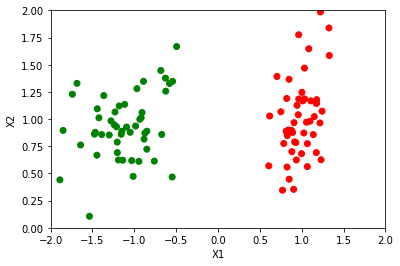

In [4]:
plot_dataset(X, y)
plt.axis([-2,2,0,2])

# Linear SVM

In [5]:
from sklearn.svm import LinearSVC
lin_svc = LinearSVC(C=float('inf')) # Hard Margin
lin_svc.fit(X, y)

LinearSVC(C=inf)

In [6]:
lin_svc.coef_

array([[-1.75448252,  0.07774313]])

In [7]:
lin_svc.intercept_

array([0.00389808])

In [8]:
w1, w2 = lin_svc.coef_[0]
b = lin_svc.intercept_[0]

Let, $x1$ and $x2$ be the features, $w1$ and $w2$ denote coefficients or weights, and bias is denoted by $b$.

Then, decision boundary is given by:
$$
\begin{align}
&w1.x1 + w2.x2 + b = 0\\
&x2 = -x1.\frac{w1}{w2}-\frac{b}{w2} 
\end{align}
$$

Support Vector for positive class:
$$
\begin{align}
&w1.x1 + w2.x2 + b = 1\\
&x2 = -x1.\frac{w1}{w2}-\frac{b}{w2} + \frac{1}{w2}
\end{align}
$$

Support Vector for negative class:
$$
\begin{align}
&w1.x1 + w2.x2 + b = -1\\
&x2 = -x1.\frac{w1}{w2}-\frac{b}{w2} - \frac{1}{w2}
\end{align}
$$

In [9]:
def plot_decision_boundary(X, y, w, b):
    w1, w2 = w
    X1, X2 = X[:,0], X[:,1]
    x1 = np.linspace(min(X1), max(X1), 10)
    x2 = -x1*w1/w2 - b/w2
    plot_dataset(X, y)
    plt.plot(x1, x2, 'b-') # plotting decision boundary
    plt.plot(x1, x2-1/w2, 'r--') # support vector (-ve class)
    plt.plot(x1, x2+1/w2, 'g--') # support vector (+ve class)

(-2.0, 2.0, 0.0, 2.0)

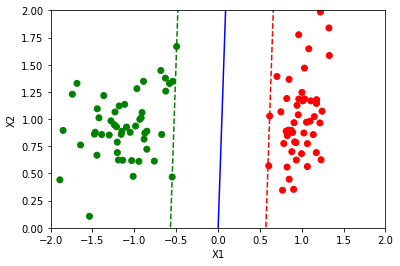

In [10]:
plot_decision_boundary(X, y, [w1, w2], b)
plt.axis([-2,2,0,2])

# Soft Margin Classifiers

## New Sample Dataset

In [11]:
X_smc, y_smc = make_classification(
    n_samples=100,
    n_features=2,
    n_informative=2,
    n_redundant=0,
    n_repeated=0,
    n_clusters_per_class=1,
    class_sep=0.5,
    random_state=1
)

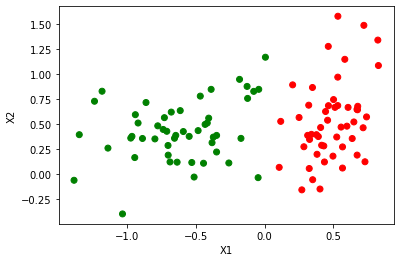

In [12]:
plot_dataset(X_smc, y_smc)

In [13]:
def dec_boundary_for_C(C, X, y):
    # fitting the decision boundary
    from sklearn.svm import LinearSVC
    lin_svc = LinearSVC(C=C)
    lin_svc.fit(X, y)
    
    # plotting decision boundary
    w = lin_svc.coef_[0]
    b = lin_svc.intercept_[0]
    plot_decision_boundary(X, y, w, b)

(-1.5, 1.0, -0.5, 2.0)

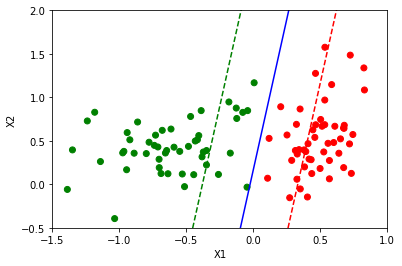

In [14]:
dec_boundary_for_C(1, X_smc, y_smc)
plt.axis([-1.5,1.0,-0.5,2])

(-1.5, 1.0, -0.5, 2.0)

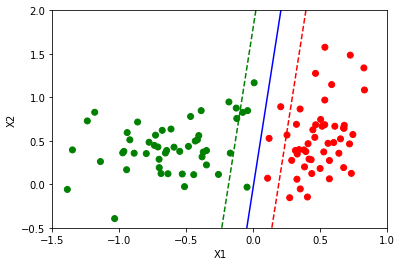

In [15]:
dec_boundary_for_C(10, X_smc, y_smc)
plt.axis([-1.5,1.0,-0.5,2])

/home/shaker/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


(-1.5, 1.0, -0.5, 2.0)

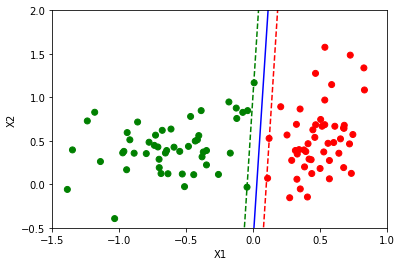

In [16]:
dec_boundary_for_C(float('inf'), X_smc, y_smc)
plt.axis([-1.5,1.0,-0.5,2])

# Non Linear SVM

In [182]:
from sklearn.datasets import make_moons

In [183]:
X, y = make_moons(n_samples=200, noise=0.15, random_state=69)

(-1.5, 2.5, -1.0, 2.0)

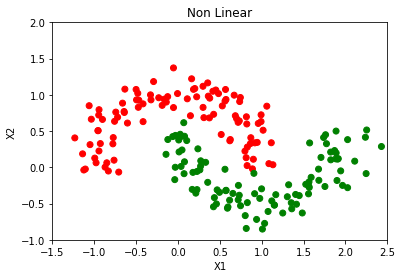

In [193]:
plot_dataset(X, y, title="Non Linear")
plt.axis([-1.5,2.5,-1,2])

## Adding polynomial features

In [185]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures, StandardScaler

lin_svc = Pipeline([
    ("poly_features", PolynomialFeatures(degree=3)),
    ("scaler", StandardScaler()),
    ("lin_svm", LinearSVC(C=10, loss="hinge"))
])

lin_svc.fit(X, y)

/home/shaker/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Pipeline(steps=[('poly_features', PolynomialFeatures(degree=3)),
                ('scaler', StandardScaler()),
                ('lin_svm', LinearSVC(C=10, loss='hinge'))])

In [186]:
def plot_non_lin_dec_boundary(clf, axis):
    a0 = np.linspace(axis[0], axis[1], 1000)
    a1 = np.linspace(axis[2], axis[3], 1000)
    x1, x2 = np.meshgrid(a0, a1)
    y_pred = clf.predict(np.c_[x1.ravel(), x2.ravel()])
    Z = y_pred.reshape(x1.shape)
    plt.contourf(x1, x2, Z, levels=2, colors=["red", "blue", "green"], alpha=0.3)

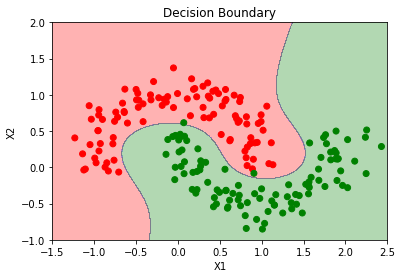

In [187]:
plot_non_lin_dec_boundary(lin_svc, [-1.5, 2.5, -1, 2])
plot_dataset(X, y, title="Decision Boundary")

## Using Polynomial Kernel

In [188]:
from sklearn.svm import SVC
poly_svm = Pipeline([
    ("scaler", StandardScaler()),
    ("poly_svm", SVC(kernel='poly', C=10, degree=3, coef0=1))
])
poly_svm.fit(X, y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('poly_svm', SVC(C=10, coef0=1, kernel='poly'))])

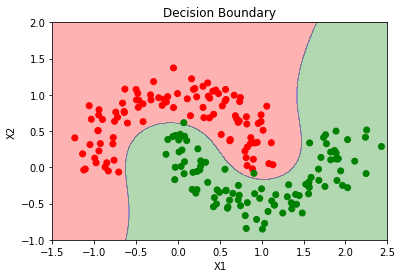

In [189]:
plot_non_lin_dec_boundary(poly_svm, [-1.5, 2.5, -1, 2])
plot_dataset(X, y, title="Decision Boundary")

In [190]:
def degree_fit(C, degree, coef0):
    poly_svm = Pipeline([
        ("scaler", StandardScaler()),
        ("poly_svm", SVC(kernel='poly', C=C, degree=degree, coef0=coef0))
    ])
    poly_svm.fit(X, y)
    plot_non_lin_dec_boundary(poly_svm, [-1.5, 2.5, -1, 2])
    plot_dataset(X, y, title=f"C={C}, degree={degree}, coef0={coef0}")

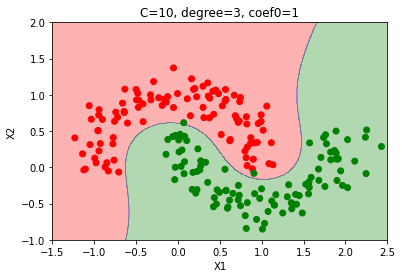

In [191]:
degree_fit(C=10, degree=3, coef0=1)

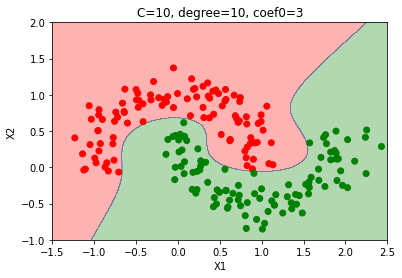

In [192]:
degree_fit(C=10, degree=10, coef0=3)